In [1]:
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

import itertools as it

In [2]:
data_original = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 dollars
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in 1000's dollars

Судя по описанию, на данном этапе ни один из столбцов нет необходимости исключать.

In [5]:
data.shape

(506, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


В датасете 506 выборок домов, 13 параметров и 1 целевая характеристика.

In [7]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

В датасете не имеются пропуски данных.

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


По данной таблице сложно сделать какие-либо данные по качеству данных. Странным, возможно, выглядит параметр "В", так как большой разрыв между минимальным значением и 25-м квартилем, а потом распределение довольно плотное до максимального значения. Но это опять таки не говорит о качестве данных. Также мы можем видеть, что параметр "CHAS" - дискретная величина, принимающая только два значения - 0 и 1.

Посмотрим на матрицу корреляций, для того, чтобы выбрать наиболее коррелирующие с целевым признаки.

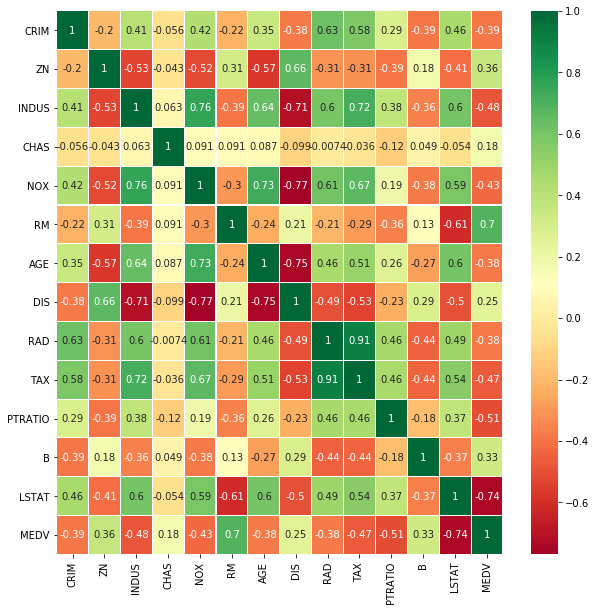

In [9]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

По матрице корреляций мы увидели, что сильнее всего наша целевая величина коррелирует с параметром "RM" (среднее кол-во комнат), а также имеет сильную отрицательную корреляцию с параметром "LSTAT" (доля бедного населения).

Параметр "CHAS" слабо коррелирует со всеми параметрами, в частности с целевым, поэтому его я исключаю.

In [10]:
data.drop(['CHAS'], axis=1, inplace = True)

In [11]:
data.shape

(506, 13)

Посмотрим распределения некоторых параметров.

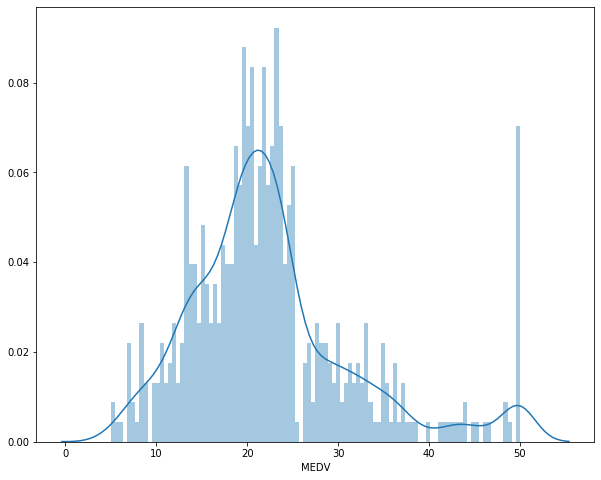

In [12]:
plt.figure(figsize = (10,8))
sns.distplot(data.MEDV, bins=100)
plt.show()

Распределение выглядит нормально, за исключением выброса на уровне 50. Посмотрим, что туда попало и сколько там строк.

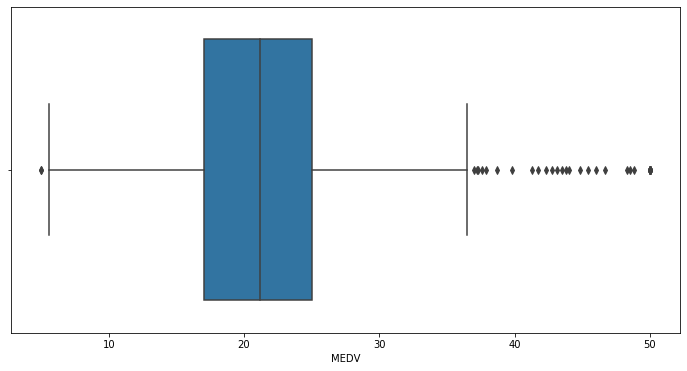

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data.MEDV)
plt.show()

In [14]:
data[data['MEDV'] == 50]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


Всего 16 строк с максимальным значением стоимости 50. Здесь аномальными выглядят несколько строк с высоким уровнем преступности. Посмотрим отдельно на них.

In [15]:
data[(data['MEDV'] == 50) & (data['CRIM'] > 4)]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
368,4.89822,0.0,18.1,0.631,4.970,100.0,1.3325,24,666,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,0.631,6.683,96.8,1.3567,24,666,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0


Здесь также высокий уровень индустриализации, доли бедного населения, и налогов, что должны отрицательно влиять на цену. Предлагается исключить данные строки.

In [16]:
data = data.loc[~((data['MEDV'] == 50) & (data['CRIM'] > 4))]
data.shape

(501, 13)

In [17]:
data[data['MEDV'] == 50]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0


Также я решил исключить аномалии с высоким уровнем индустриализации, высокими налогами, и высокой долей старого жилья.

In [18]:
data = data.loc[~((data['MEDV'] == 50) & (data['INDUS'] > 18))]
data.shape

(497, 13)

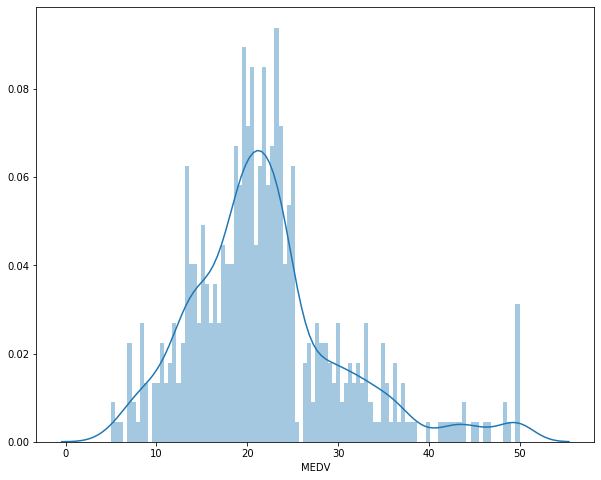

In [19]:
plt.figure(figsize = (10,8))
sns.distplot(data.MEDV, bins=100)
plt.show()

Большое количество строк с максимальной стоимостью жилья остается, поэтому сравним данную выборку с выборкой со стоимостью жилья от 40 до 50 по двум самым коррелирующим с целевым показателям.

In [20]:
data[(data['MEDV'] < 50) & (data['MEDV'] > 40)][['RM', 'LSTAT']].describe()

,RM,LSTAT
count,15.000000,15.000000
mean,7.821867,3.954000
std,0.412712,1.216598
min,6.943000,2.470000
25%,7.565000,3.135000
50%,7.820000,3.760000
75%,8.253000,4.045000
max,8.398000,7.260000


In [21]:
data[data['MEDV'] == 50]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
186,0.05602,0.0,2.46,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.5750,8.297,67.0,2.4216,5,264,13.0,384.54,7.44,50.0
283,0.01501,90.0,1.21,0.4010,7.923,24.8,5.8850,1,198,13.6,395.52,3.16,50.0


Нельзя однозначно сказать, что строки с максимальной стоимостью жиль отличаются от строк с высокой стоимостью.

Посмотрим на предмет выбросов с помощью точечных графиков взаимосвязи между целевой стоимостью и показателями "RM" и "LSTAT"

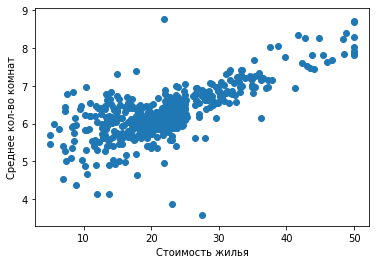

In [22]:
plt.scatter(data['MEDV'], data['RM'])
plt.xlabel('Стоимость жилья')
plt.ylabel('Среднее кол-во комнат')
plt.show()

Заметна линейная зависимость стоимости жилья от среднего количества комнат, хотя все еще есть некоторые выбросы. Посмотрим на них.

In [23]:
data.loc[((data['MEDV'] < 30) & ((data['RM'] > 8) | (data['RM'] < 4)))]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
364,3.47428,0.0,18.1,0.718,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0.718,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.631,3.863,100.0,1.5106,24,666,20.2,131.42,13.33,23.1


Я решил их исключить, так как это всего 3 значения, а графически они сильно отличаются от выборки. И странно то, что по большинству показателей они схожи между собой, но сильно отличаются по количеству комнат и уровню бедности.

In [24]:
data = data.loc[~((data['MEDV'] < 30) & ((data['RM'] > 8) | (data['RM'] < 4)))]
data.shape

(494, 13)

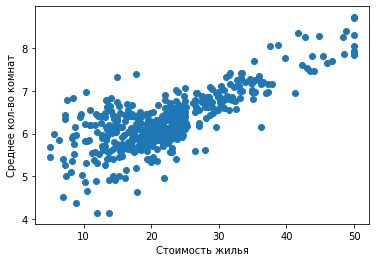

In [25]:
plt.scatter(data['MEDV'], data['RM'])
plt.xlabel('Стоимость жилья')
plt.ylabel('Среднее кол-во комнат')
plt.show()

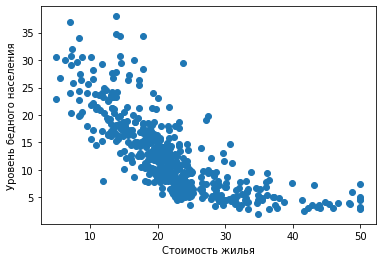

In [26]:
plt.scatter(data['MEDV'], data['LSTAT'])
plt.xlabel('Стоимость жилья')
plt.ylabel('Уровень бедного населения')
plt.show()

Стоимость жилья снижается со увеличением уровня бедности, но заметна не совсем линейная зависимость.

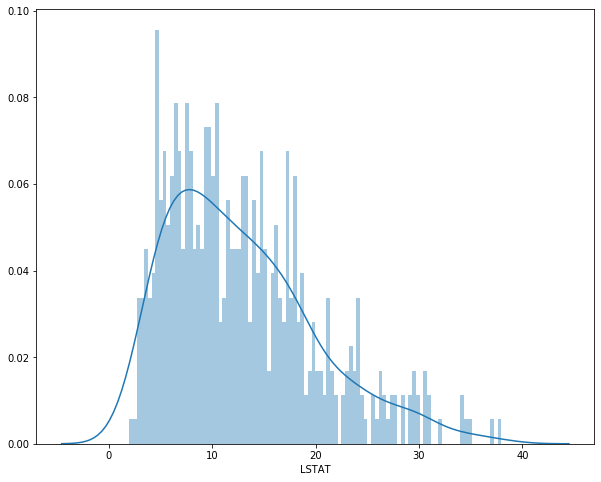

In [27]:
plt.figure(figsize = (10,8))
sns.distplot(data.LSTAT, bins=100)
plt.show()

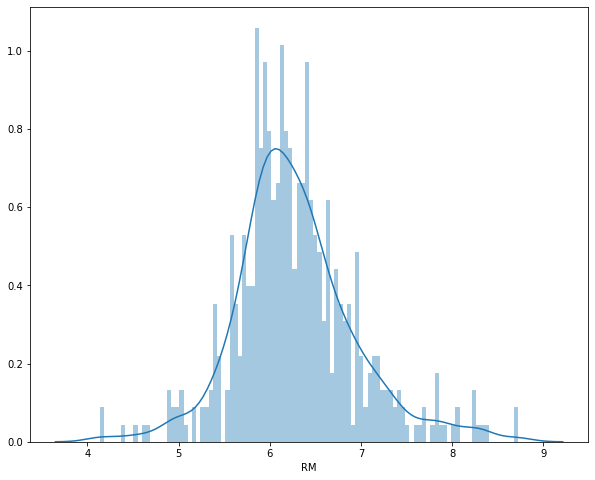

In [28]:
plt.figure(figsize = (10,8))
sns.distplot(data.RM, bins=100)
plt.show()

Судя по распределениям данных показателей, они выглядят адекватно, без аномальных выбросов

Еще раз посомтрим на матрицу корреляций после преобразований.

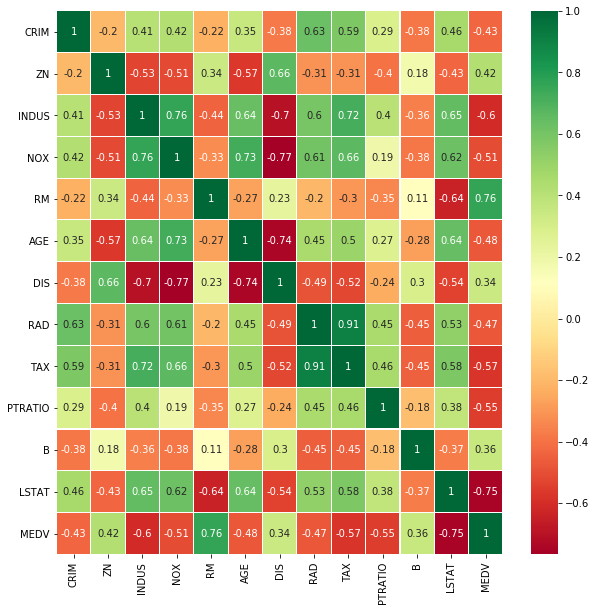

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

По части показателей усилилась корреляция, в частности по показателю "RM", "LSTAT", "INDUS", "TAX", что возможно поможет нам при построении модели.

**Приступим к обучению модели**

In [30]:
X = data.drop(['MEDV'], axis=1)
y = data[['MEDV']]

X_orig = data_original.drop(['MEDV'], axis=1)
y_orig = data_original[['MEDV']]

Разделил датасет на все параметры, влияющие на целевой показатель, и сам целевой показатель. Причем как по оригинальному датасету, так и по обработанному, чтобы посмотреть, как обработка повлияла на финальный результат.

In [31]:
minmax_scaler = MinMaxScaler()
X = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)
X_orig = pd.DataFrame(minmax_scaler.fit_transform(X_orig), columns=X_orig.columns)

Произвел нормализацию данных с помощью MinMaxScaler.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_orig_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig, y_orig, test_size = 0.2)

Разделил данные на 80% тренировочных и на 20% тестовых

In [33]:
def train_model(columns):
    model = LinearRegression()

    model.fit(X_train[columns], y_train)
    prediction = model.predict(X_test[columns])
    print('Error new: {}'.format(mean_absolute_error(y_test, prediction)))

    model.fit(X_orig_train[columns], y_orig_train)
    prediction = model.predict(X_orig_test[columns])
    print('Error original: {}'.format(mean_absolute_error(y_orig_test, prediction)))

train_model(X.columns)

Error new: 2.6619335732906606
Error original: 3.502239886490141


Ошибка составила 2.6 и 3.5 для обработанного датасета и оригинального соответственно. Уже заметно преимущество обработки датасета.

In [34]:
train_model(['RM', 'LSTAT'])

Error new: 3.4517094834887763
Error original: 3.8806964424335866


Посчитал ошибку, используя только два самых коррелирующих со стоимость жилья показателя, но результаты ухудшились.

Попробуем подобрать параметры для поиска самой наименьшей ошибки

In [36]:
def train_model_search(columns):
    model = LinearRegression()

    model.fit(X_train[columns], y_train)
    prediction = model.predict(X_test[columns])
    return mean_absolute_error(y_test, prediction)

train_model_search(X.columns)

2.6619335732906606

In [41]:
columns = list(X.columns)
errors_list = []
params_list = []
for n in range(2, len(columns) + 1):
    for features in it.combinations(columns, n):
        errors_list.append(train_model_search(list(features)))
        params_list.append(features)
train_model(list(params_list[errors_list.index(min(errors_list))]))

Error new: 2.6619335732906606
Error original: 3.502239886490141


Можно сделать вывод, что использование всех параметров в обучении модели дает наименьшую ошибку, при этом очистка датасета от аномалий также заметно уменьшает ошибку.